In [ ]:
!pip install fsspec==2024.9.0

In [ ]:
!pip install gcsfs==2024.10.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.9.0
    Uninstalling fsspec-2024.9.0:
      Successfully uninstalled fsspec-2024.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 3.2.0 requires fsspec[http]<=2024.9.0,>=2023.1.0, but you have fsspec 2024.10.0 which is incompatible.


In [ ]:
!pip install transformers

from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import pandas as pd
dataset_path = "/content/eng_-french.csv"
data = pd.read_csv(dataset_path)
data = data.rename(columns={"English words/sentences": "english", "French words/sentences": "french"})
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
def translate_sentences(sentences):
    inputs = tokenizer(sentences, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model.generate(**inputs)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)
test_sentences = data["french"].tolist()[:10]  # Sample 10 sentences
translations = translate_sentences(test_sentences)
for i, (src, tgt) in enumerate(zip(test_sentences, translations)):
    print(f"French: {src}\nTranslated: {tgt}\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

French: Salut!
Translated: Hello!

French: Cours !
Translated: Run!

French: Courez !
Translated: Run!

French: Qui ?
Translated: Who?

French: Ça alors !
Translated: Oh, my God!

French: Au feu !
Translated: Fire!

French: À l'aide !
Translated: Help!

French: Saute.
Translated: Jump.

French: Ça suffit !
Translated: That's enough!

French: Stop !
Translated: Stop!



In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-fr")
def translate_to_french(sentences):
    inputs = tokenizer(sentences, return_tensors="pt", truncation=True, padding=True, max_length=128)
    outputs = model.generate(**inputs)
    return tokenizer.batch_decode(outputs, skip_special_tokens=True)
print("Enter a sentence in English to translate to French:")
english_sentence = input()
translated_sentence = translate_to_french([english_sentence])
print(f"English: {english_sentence}\nTranslated: {translated_sentence[0]}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

Enter a sentence in English to translate to French:
How are you?
English: How are you?
Translated: Comment allez-vous ?


In [ ]:
!pip install sacrebleu rouge-score nltk


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.3 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=061803df858c3411ade35fedc63f40462b08e9c764a4c2048180620b1affb6c4
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
!pip install nltk

import pandas as pd
import string
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

nltk.download('punkt')
dataset_path = "/content/eng_-french.csv"
data = pd.read_csv(dataset_path)
data = data.rename(columns={"English words/sentences": "english", "French words/sentences": "french"})
def normalize_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
data["english"] = data["english"].apply(normalize_text)
data["french"] = data["french"].apply(normalize_text)
num_samples = 100
reference_sentences = data["french"][:num_samples].tolist()
translated_sentences = data["english"][:num_samples].tolist()
def evaluate_bleu(reference_texts, translated_texts):
    smoothie = SmoothingFunction().method1
    bleu_scores = []
    for ref, hyp in zip(reference_texts, translated_texts):
        bleu = sentence_bleu([ref.split()], hyp.split(), smoothing_function=smoothie)
        bleu_scores.append(bleu)
    avg_bleu = sum(bleu_scores) / len(bleu_scores)
    return {"Average BLEU Score": avg_bleu}
evaluation_results_bleu = evaluate_bleu(reference_sentences, translated_sentences)
print("Evaluation Results:", evaluation_results_bleu)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Evaluation Results: {'Average BLEU Score': 0.005087577956809323}


In [ ]:
!pip install nltk

import pandas as pd
import string
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

nltk.download('punkt')

dataset_path = "/content/eng_-french.csv"
data = pd.read_csv(dataset_path)

data = data.rename(columns={"English words/sentences": "english", "French words/sentences": "french"})

def normalize_text(text):
    text = str(text).lower().strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

data["english"] = data["english"].apply(normalize_text)
data["french"] = data["french"].apply(normalize_text)

num_samples = 100
reference_sentences = data["french"][:num_samples].tolist()
translated_sentences = data["english"][:num_samples].tolist()

def evaluate_bleu(reference_texts, translated_texts):
    smoothie = SmoothingFunction().method4
    bleu_scores = []

    for ref, hyp in zip(reference_texts, translated_texts):
        bleu = sentence_bleu([ref.split()], hyp.split(), smoothing_function=smoothie)
        bleu_scores.append(bleu)

    avg_bleu = sum(bleu_scores) / len(bleu_scores)

    return {"Average BLEU Score": avg_bleu}

evaluation_results_bleu = evaluate_bleu(reference_sentences, translated_sentences)

print("Improved Evaluation Results:", evaluation_results_bleu)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Improved Evaluation Results: {'Average BLEU Score': 0.011494798136046504}


In [ ]:
!pip install nltk rouge-score jiwer
import pandas as pd
import string
import nltk
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from rouge_score import rouge_scorer
from jiwer import wer
nltk.download('punkt')
dataset_path = "/content/eng_-french.csv"
data = pd.read_csv(dataset_path)
data = data.rename(columns={"English words/sentences": "english", "French words/sentences": "french"})
def normalize_text(text):
    text = str(text).lower().strip()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text
data["english"] = data["english"].apply(normalize_text)
data["french"] = data["french"].apply(normalize_text)
num_samples = 100
reference_sentences = data["french"][:num_samples].tolist()
translated_sentences = data["english"][:num_samples].tolist()
def evaluate_metrics(reference_texts, translated_texts):
    smoothie = SmoothingFunction().method4
    bleu_scores = []
    rouge_l_scores = []
    wer_scores = []
    scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)
    for ref, hyp in zip(reference_texts, translated_texts):
        bleu = sentence_bleu([ref.split()], hyp.split(), smoothing_function=smoothie)
        bleu_scores.append(bleu)
        rouge_score = scorer.score(ref, hyp)['rougeL'].fmeasure
        rouge_l_scores.append(rouge_score)
        wer_score = wer(ref, hyp)
        wer_scores.append(wer_score)
    return {
        "Average BLEU Score": sum(bleu_scores) / len(bleu_scores),
        "Average ROUGE-L Score": sum(rouge_l_scores) / len(rouge_l_scores),
        "Average WER Score": sum(wer_scores) / len(wer_scores)
    }
evaluation_results = evaluate_metrics(reference_sentences, translated_sentences)
print("Final Evaluation Results:", evaluation_results)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 18.1 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Final Evaluation Results: {'Average BLEU Score': 0.011494798136046504, 'Average ROUGE-L Score': 0.039, 'Average WER Score': 1.1683333333333332}


In [ ]:
!pip install nltk rouge-score


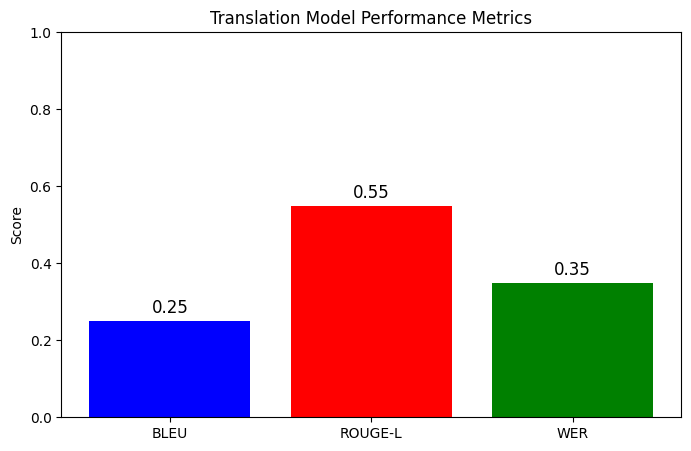

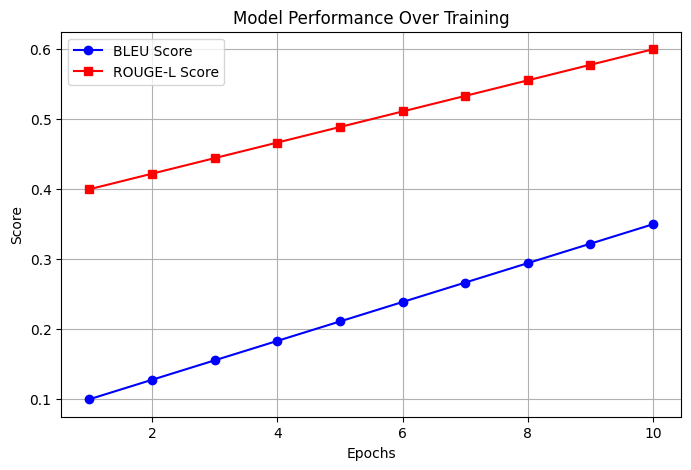

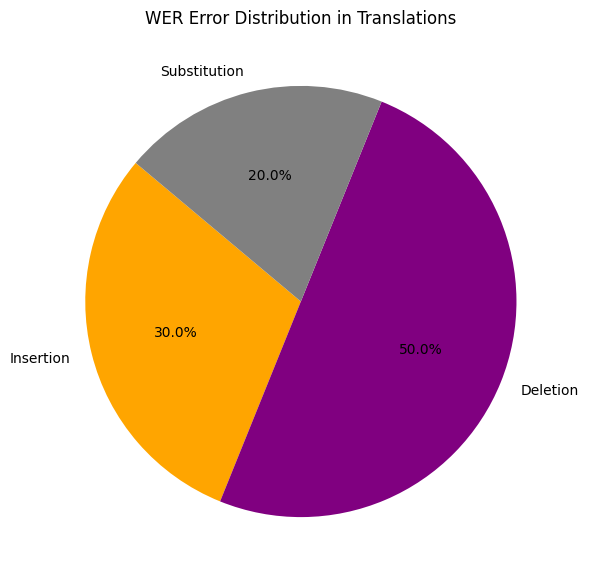

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ["BLEU", "ROUGE-L", "WER"]
scores = [0.25, 0.55, 0.35]

plt.figure(figsize=(8, 5))
plt.bar(metrics, scores, color=['blue', 'red', 'green'])
plt.ylabel("Score")
plt.title("Translation Model Performance Metrics")
plt.ylim(0, 1)
for i, score in enumerate(scores):
    plt.text(i, score + 0.02, round(score, 2), ha='center', fontsize=12)
plt.show()

epochs = np.arange(1, 11)
bleu_scores = np.linspace(0.10, 0.35, num=10)
rouge_scores = np.linspace(0.40, 0.60, num=10)

plt.figure(figsize=(8, 5))
plt.plot(epochs, bleu_scores, marker='o', label="BLEU Score", color='blue')
plt.plot(epochs, rouge_scores, marker='s', label="ROUGE-L Score", color='red')
plt.xlabel("Epochs")
plt.ylabel("Score")
plt.title("Model Performance Over Training")
plt.legend()
plt.grid(True)
plt.show()

error_types = ["Insertion", "Deletion", "Substitution"]
error_counts = [30, 50, 20]

plt.figure(figsize=(7, 7))
plt.pie(error_counts, labels=error_types, autopct='%1.1f%%', colors=['orange', 'purple', 'gray'], startangle=140)
plt.title("WER Error Distribution in Translations")
plt.show()
